# Importing libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Downloading the dataset
One can can download the ZIP file with a copy of most of the personal data by using the automated
Download your data function on the Privacy Settings section of account page in Spotify.
## Instructions for downloading the dataset
1. Go to the Privacy Settting Page of your Spotify Account.
1
2. Scroll to the bottom and you’ll see a section called Download Your Data.
3. You’ll see a three step process with instruction to download the data.
4. You have to to Request for your data the you’ll get an confirmation email from
Spotify to Confirm the request.
5. After collecting the required information, Spotify will create a Zip File and send
you an email with the link to download it.

## Reading the data

In [2]:
df1 = pd.read_json('/content/StreamingHistory0.json')
df1.head()

,endTime,artistName,trackName,msPlayed
0,2023-07-10 08:07,Tanishk Bagchi,Raataan Lambiyan,177845
1,2023-07-10 08:56,Tanishk Bagchi,Raataan Lambiyan,7124
2,2023-07-10 09:51,Hassan & Roshaan,Ehsaas - Reimagined,9157
3,2023-07-10 09:51,Hassan & Roshaan,Ehsaas,177882
4,2023-07-10 09:55,Hassan & Roshaan,Sukoon,255764


In [3]:
df2 = pd.read_json('/content/SearchQueries.json')
df2.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2023-07-10T09:48:16.451Z[UTC],ehsaa,[spotify:track:76HPD4pZrTFQSqBGcKG7nn]
1,ANDROID_ARM,2023-07-10T09:48:47.682Z[UTC],hass,[]
2,ANDROID_ARM,2023-07-10T09:48:47.894Z[UTC],hassa,[]
3,ANDROID,2023-07-10T09:48:49.079Z[UTC],hassan and,[spotify:artist:5hjVqhHwLYWW9ZIxuILJF7]
4,ANDROID_ARM,2023-07-10T09:58:34.508Z[UTC],bekr,[]


# Merging the Data


In [4]:
spotify_df = pd.concat([df1,df2], ignore_index=True)
spotify_df.head()

,endTime,artistName,trackName,msPlayed,platform,searchTime,searchQuery,searchInteractionURIs
0,2023-07-10 08:07,Tanishk Bagchi,Raataan Lambiyan,177845.0,NaN,NaN,NaN,NaN
1,2023-07-10 08:56,Tanishk Bagchi,Raataan Lambiyan,7124.0,NaN,NaN,NaN,NaN
2,2023-07-10 09:51,Hassan & Roshaan,Ehsaas - Reimagined,9157.0,NaN,NaN,NaN,NaN
3,2023-07-10 09:51,Hassan & Roshaan,Ehsaas,177882.0,NaN,NaN,NaN,NaN
4,2023-07-10 09:55,Hassan & Roshaan,Sukoon,255764.0,NaN,NaN,NaN,NaN


# Data Prepration and Cleaning

In [5]:
spotify_df = pd.read_csv(r'/content/streamingHistory0.csv')
spotify_df.head(10)

,endTime,username,platform,artistName,trackName,msPlayed,incognito_mode,conn_country,user_agent_decrypted,shuffle
0,10-07-2023 08:07,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID,Tanishk Bagchi,Raataan Lambiyan,177845,False,IN,unknown,False
1,10-07-2023 08:56,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,Tanishk Bagchi,Raataan Lambiyan,7124,False,IN,unknown,False
2,10-07-2023 09:51,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,Hassan & Roshaan,Ehsaas - Reimagined,9157,False,IN,unknown,False
3,10-07-2023 09:51,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID,Hassan & Roshaan,Ehsaas,177882,False,IN,unknown,False
4,10-07-2023 09:55,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,Hassan & Roshaan,Sukoon,255764,False,IN,unknown,False
5,10-07-2023 09:59,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,Hassan & Roshaan,Duur Se,215948,False,IN,unknown,False
6,10-07-2023 10:03,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,Rahat Fateh Ali Khan,Dillagi,249945,False,IN,unknown,False
7,10-07-2023 10:31,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID,The Breakup Story with Ashish Bagrecha,Ep11: One-Sided Wala Breakup,814919,False,IN,unknown,False
8,10-07-2023 18:01,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID,The Breakup Story with Ashish Bagrecha,Ep10: Casual Relationship Wala Breakup,13884,False,IN,unknown,False
9,10-07-2023 18:13,31ibo62lfee26rxgjoxvtsdt5eli,ANDROID_ARM,The Breakup Story with Ashish Bagrecha,"Ep9: Gharwalo Ne Kaante Parr, Kya Kare Sir?",47061,False,IN,unknown,False


In [6]:
spotify_df.shape

(1006, 10)

In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   endTime               1006 non-null   object
 1   username              1006 non-null   object
 2   platform              1006 non-null   object
 3   artistName            1006 non-null   object
 4   trackName             1006 non-null   object
 5   msPlayed              1006 non-null   int64 
 6   incognito_mode        1006 non-null   bool  
 7   conn_country          1006 non-null   object
 8   user_agent_decrypted  1006 non-null   object
 9   shuffle               1006 non-null   bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 65.0+ KB


In [8]:
spotify_df.nunique()

endTime                 708
username                  1
platform                  2
artistName              282
trackName               633
msPlayed                899
incognito_mode            1
conn_country              1
user_agent_decrypted      1
shuffle                   1
dtype: int64

In [9]:
spotify_stream_df = spotify_df[['endTime', 'msPlayed', 'trackName', 'artistName']].copy()
spotify_stream_df.head(10)

,endTime,msPlayed,trackName,artistName
0,10-07-2023 08:07,177845,Raataan Lambiyan,Tanishk Bagchi
1,10-07-2023 08:56,7124,Raataan Lambiyan,Tanishk Bagchi
2,10-07-2023 09:51,9157,Ehsaas - Reimagined,Hassan & Roshaan
3,10-07-2023 09:51,177882,Ehsaas,Hassan & Roshaan
4,10-07-2023 09:55,255764,Sukoon,Hassan & Roshaan
5,10-07-2023 09:59,215948,Duur Se,Hassan & Roshaan
6,10-07-2023 10:03,249945,Dillagi,Rahat Fateh Ali Khan
7,10-07-2023 10:31,814919,Ep11: One-Sided Wala Breakup,The Breakup Story with Ashish Bagrecha
8,10-07-2023 18:01,13884,Ep10: Casual Relationship Wala Breakup,The Breakup Story with Ashish Bagrecha
9,10-07-2023 18:13,47061,"Ep9: Gharwalo Ne Kaante Parr, Kya Kare Sir?",The Breakup Story with Ashish Bagrecha


In [10]:
spotify_stream_df.sample(10)

,endTime,msPlayed,trackName,artistName
424,03-08-2023 10:40,2399,Ranjha - Lofi Flip,VIBIE
343,30-07-2023 17:31,265264,Ram Siya Ram,Sachet Tandon
962,09-09-2023 13:45,918,khoya sa,KASYAP
226,25-07-2023 16:16,223107,Heer Ranjha,Rito Riba
198,23-07-2023 15:38,185120,Phir Le Aya Dil - Lofi Flip,Kritiman Mishra
351,30-07-2023 17:40,55639,Tum Prem Ho,Arun Prajith
947,08-09-2023 10:23,118855,Aisay Kaisay,Hasan Raheem
403,02-08-2023 19:11,63705,Buniyaad 2.0,The Yellow Diary
665,16-08-2023 08:02,4324,Dil Meri Na Sune (Reprise),Atif Aslam
39,11-07-2023 13:55,4412,Tere Liye,Madan Mohan


In [11]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

282

In [12]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

633

# Data formatting

In [13]:
spotify_stream_df["playTime"]= pd.to_datetime(spotify_stream_df["endTime"]) # To create a additional column

In [14]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["playTime"]).hour
spotify_stream_df['dayName'] = spotify_stream_df["playTime"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1

In [15]:
spotify_stream_df["timePlayed (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

In [16]:
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

spotify_stream_df["listeningTime(Hours)"] = spotify_stream_df["timePlayed (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["listeningTime(Minutes)"] = spotify_stream_df["timePlayed (hh-mm-ss)"].apply(minutes).round(3)

In [17]:
spotify_stream_df.head() # To check the newly formed dataset with additional columns

,endTime,msPlayed,trackName,artistName,playTime,year,month,day,weekday,time,hours,dayName,Count,timePlayed (hh-mm-ss),listeningTime(Hours),listeningTime(Minutes)
0,10-07-2023 08:07,177845,Raataan Lambiyan,Tanishk Bagchi,2023-10-07 08:07:00,2023,10,7,5,08:07:00,8,Saturday,1,0 days 00:02:57.845000,0.049,2.950
1,10-07-2023 08:56,7124,Raataan Lambiyan,Tanishk Bagchi,2023-10-07 08:56:00,2023,10,7,5,08:56:00,8,Saturday,1,0 days 00:00:07.124000,0.002,0.117
2,10-07-2023 09:51,9157,Ehsaas - Reimagined,Hassan & Roshaan,2023-10-07 09:51:00,2023,10,7,5,09:51:00,9,Saturday,1,0 days 00:00:09.157000,0.002,0.150
3,10-07-2023 09:51,177882,Ehsaas,Hassan & Roshaan,2023-10-07 09:51:00,2023,10,7,5,09:51:00,9,Saturday,1,0 days 00:02:57.882000,0.049,2.950
4,10-07-2023 09:55,255764,Sukoon,Hassan & Roshaan,2023-10-07 09:55:00,2023,10,7,5,09:55:00,9,Saturday,1,0 days 00:04:15.764000,0.071,4.250


Now drop the columns which are not useful like:


*   endTime
*   timePlayed (hh-mm-ss)
*   msPlayed





In [18]:
spotify_stream_df.drop(columns=["endTime","timePlayed (hh-mm-ss)","msPlayed"], inplace=True)

In [19]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,listeningTime(Hours),listeningTime(Minutes)
count,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.0,1006.000000,1006.000000
mean,2023.0,7.660040,15.778330,2.731610,13.757455,1.0,0.030348,1.820534
std,0.0,2.261011,7.889256,2.047091,3.887577,0.0,0.029521,1.771477
min,2023.0,2.000000,7.000000,0.000000,7.000000,1.0,0.000000,0.000000
25%,2023.0,7.000000,8.000000,1.000000,10.000000,1.0,0.001000,0.083000
50%,2023.0,8.000000,14.000000,2.000000,14.000000,1.0,0.023500,1.400000
75%,2023.0,8.000000,23.000000,4.000000,17.000000,1.0,0.054000,3.233000
max,2023.0,12.000000,30.000000,6.000000,20.000000,1.0,0.226000,13.567000


# Now, we got the clean and formatted data for analysis

# Exploratory Analysis and Visualization

In [20]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<ipython-input-20-7c90d945e6ad>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


##  Artist Name (Exploration)

### We can check what is the percentage of unique artist we have.

In [21]:
unique_artists = spotify_stream_df["artistName"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["artistName"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

28.031809145129227

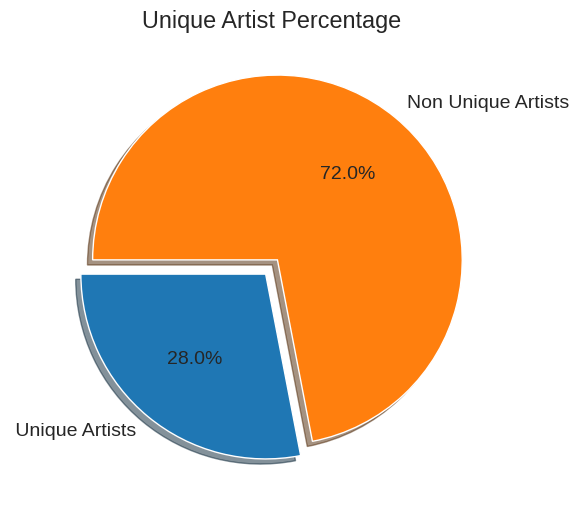

In [22]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists])
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage")
plt.show()

### We can also check the top 10 unique artist we have.

In [23]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["listeningTime(Hours)","listeningTime(Minutes)","Count"]].sum().sort_values(by="listeningTime(Minutes)",ascending=False)
top_10_artist_df.head(10)

,listeningTime(Hours),listeningTime(Minutes),Count
artistName,,,
Pritam,3.101,186.017,108
Jeet Gannguli,0.959,57.567,22
Arijit Singh,0.954,57.282,29
Darshan Raval,0.829,49.700,16
B Praak,0.791,47.299,20
Atif Aslam,0.742,44.515,17
Aditya Rikhari,0.624,37.650,29
Akhil,0.525,31.399,15
Jasleen Royal,0.490,29.316,14


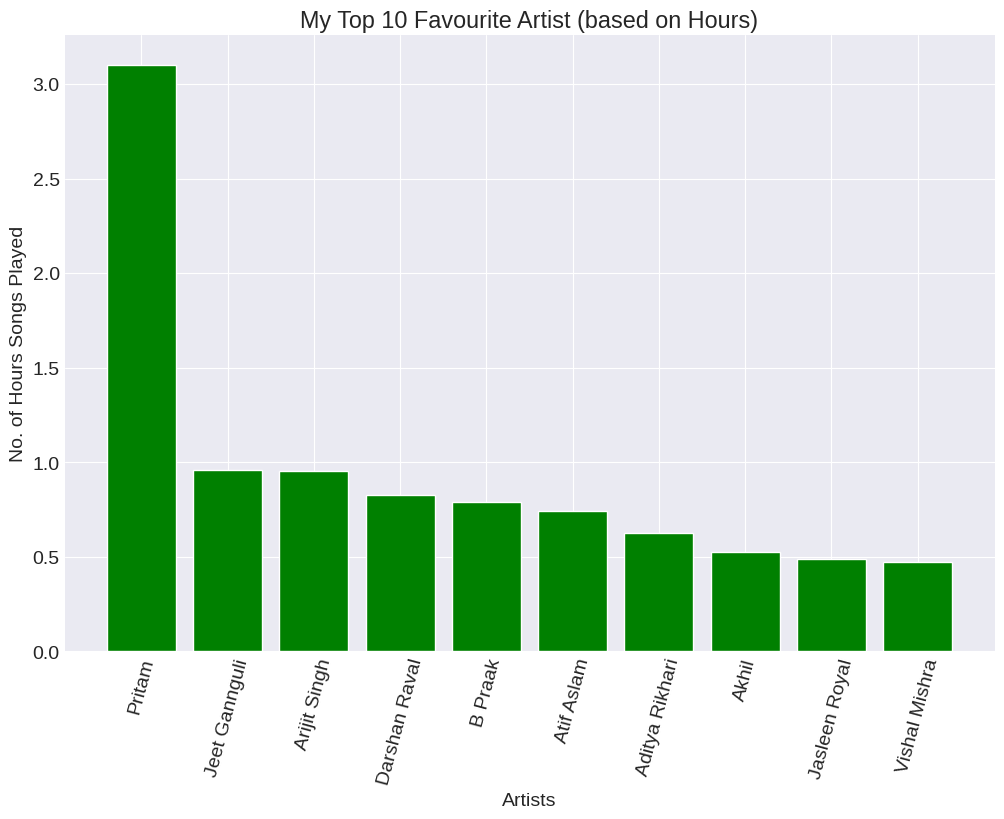

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["listeningTime(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

### Top 10 Unique Artist (count) : Based on the number of count

In [25]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["listeningTime(Hours)","listeningTime(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,listeningTime(Hours),listeningTime(Minutes),Count
artistName,,,
Pritam,3.101,186.017,108
Arijit Singh,0.954,57.282,29
Aditya Rikhari,0.624,37.650,29
VIBIE,0.428,25.617,24
Jeet Gannguli,0.959,57.567,22
B Praak,0.791,47.299,20
Atif Aslam,0.742,44.515,17
Darshan Raval,0.829,49.700,16
Vishal-Shekhar,0.430,25.850,16


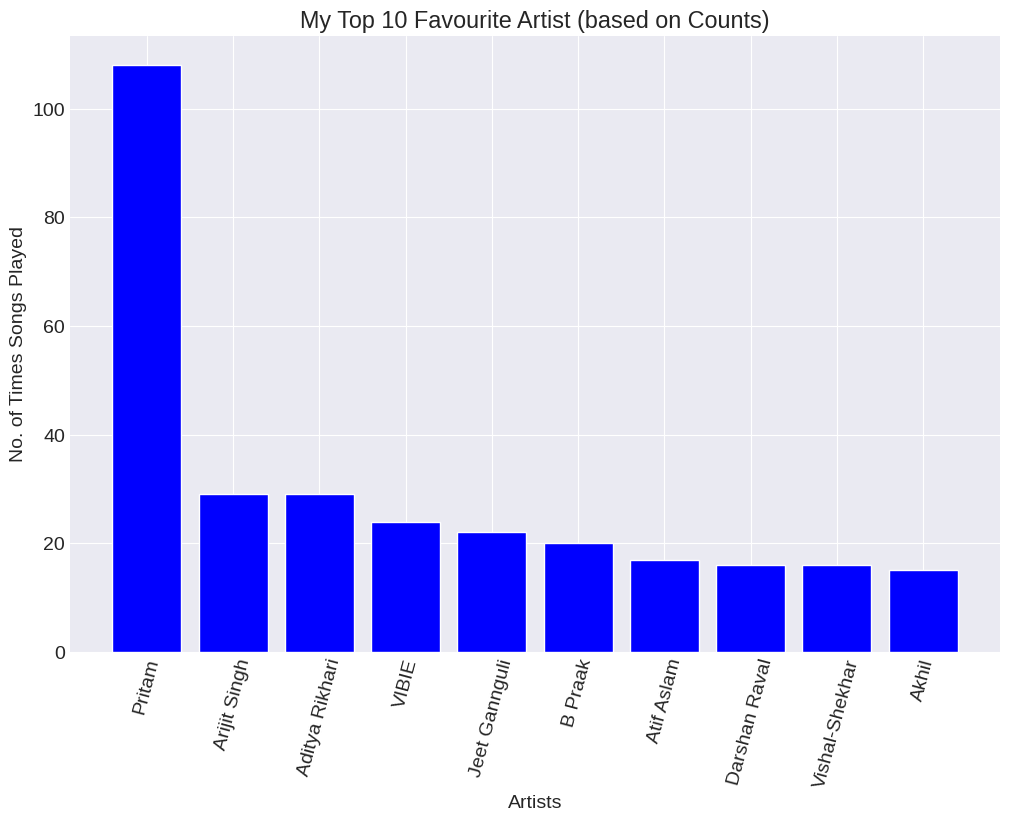

In [26]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='blue')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

##  Song Tracks (Exploration)

### We can check what is the percentage of unique songs we have

In [27]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

62.92246520874751

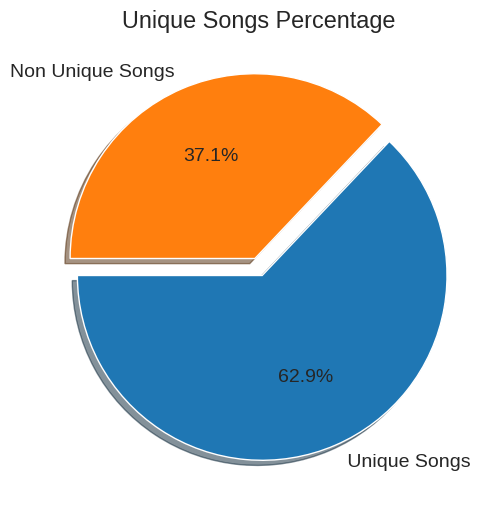

In [28]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

### We can also check the top 10 unique songs we have

In [29]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["listeningTime(Hours)","listeningTime(Minutes)","Count"]].sum().sort_values(by="listeningTime(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["listeningTime(Hours)","listeningTime(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

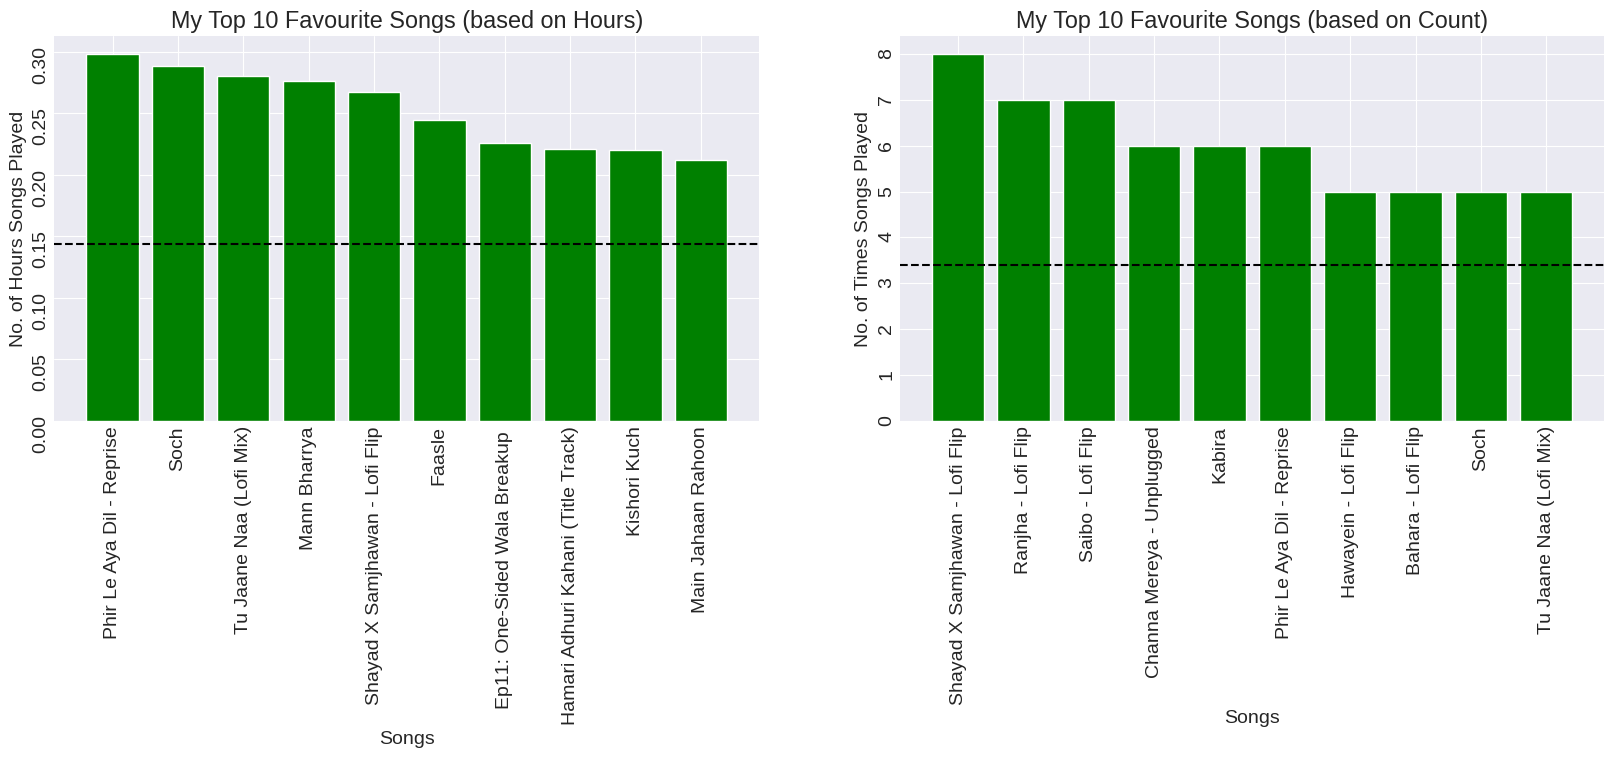

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["listeningTime(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["listeningTime(Hours)"][:100].mean(), linestyle="--", color="black")

# second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="black");

##  Day Wise Usage (Exploration)

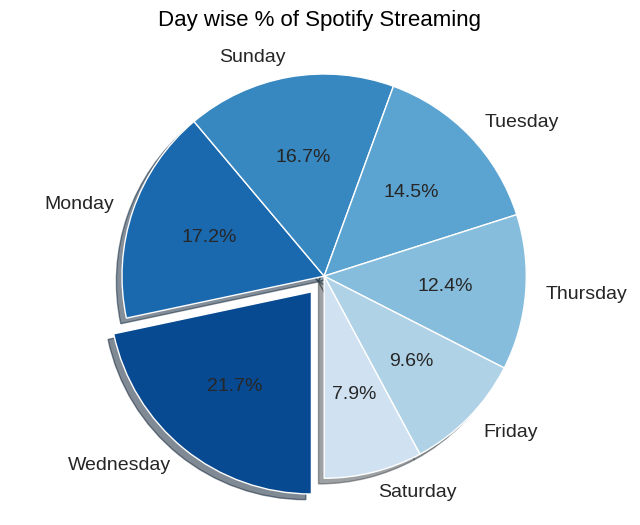

In [31]:
import matplotlib.cm as cm

day_name_counts = spotify_stream_df["dayName"].value_counts()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
colors = cm.Blues(np.linspace(0.9, 0.2, len(day_name_counts)))

# Get the maximum index
max_index = day_name_counts.argmax()

# Create an explode list
explode = [0] * len(day_name_counts)
explode[max_index] = 0.1

# Plot the pie chart
ax.pie(day_name_counts, labels=day_name_counts.index, colors=colors, autopct='%1.1f%%', startangle=-90,
       textprops={'fontsize': 14}, explode=explode, shadow=True, counterclock=False)

# Set the title and axis aspect ratio
ax.set_title('Day wise % of Spotify Streaming', pad=20, fontdict={'color': 'black', 'weight': 'normal', 'size': 16})
ax.axis('equal')

plt.show()

##  Average Usage over a day (Exploration)

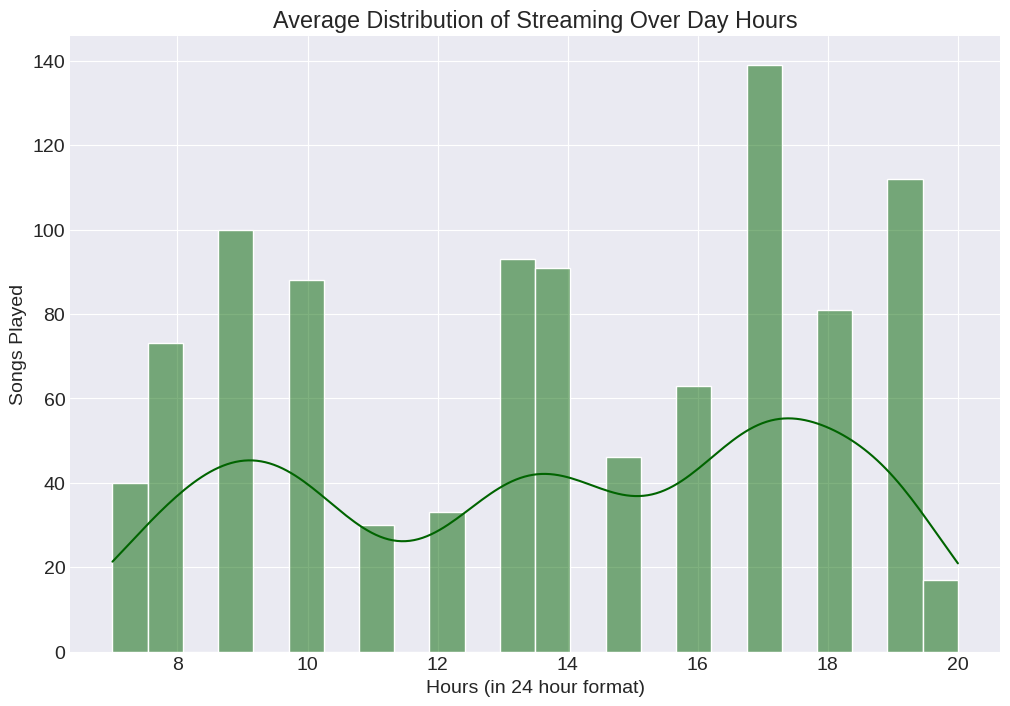

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

With this histogram graph we can see about my average usage:

1. Maximum around `7-10 PM` hour mark
2. Minimum around `11-12 AM` hour mark

## Average Usage In a Year (Exploration)

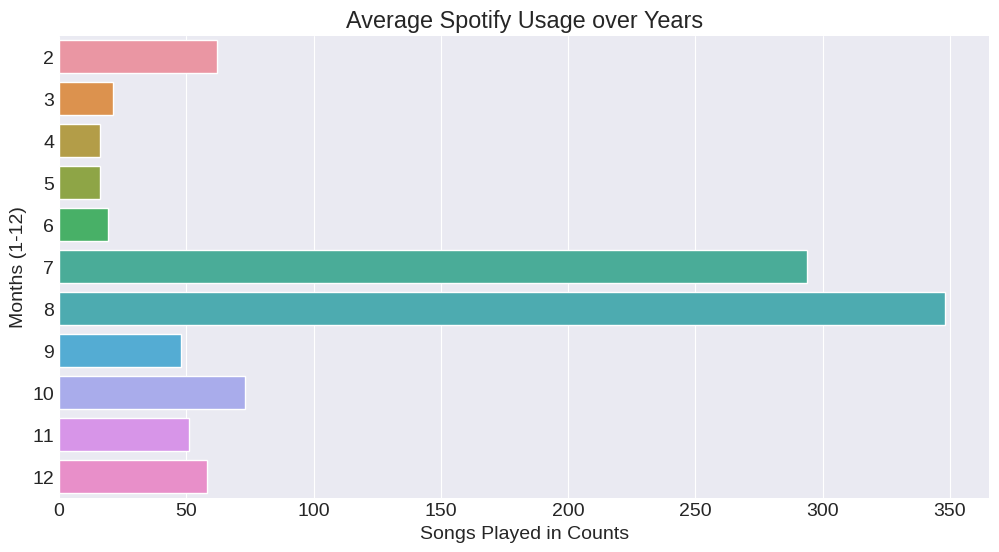

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

###  How many hours did I spent on Spotify Streaming since the day I signed up for it

Here we want to know, how many hours I spend while streaming spotify since start.

In [34]:
time_spent_hours = spotify_stream_df["listeningTime(Hours)"].sum()
time_spent_hours

30.53

For this we can simply do a summation of all the time I spent on listening to all songs.
* This comes out to be around **30 Hours**.

###  What is actual usage in percentage compared to to the total possible

Here we want to know, what is the percentage of time I spend on spotify.

This question might seem bit odd, but here we want to know that out of maximum possible hours since the start, how much time I actually spent streaming `Spotify` and we want to calculate that in percentage.

In [38]:
spotify_stream_df["playTime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1006 entries, 0 to 1005
Series name: playTime
Non-Null Count  Dtype         
--------------  -----         
1006 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.0 KB


In [39]:
date_df = spotify_stream_df["playTime"]
time_difference = (date_df.iloc[1005] - date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference_hours = time_difference*24
time_difference_hours

60.03333333333334

###  What is the average numbers of songs I played daily

In [40]:
total_songs = spotify_stream_df["trackName"].count()
time_difference

2.501388888888889

In [41]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

402.0

Here we can see that on an average I played **402** songs per day

# Some More Observations
## On which day I played maximum number of songs via scatterplot

In [42]:
spotify_stream_df["date"] = spotify_stream_df["playTime"].dt.date # Creating a new column with date

In [43]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(10)

,Count
date,
2023-08-21,58
2023-11-07,51
2023-02-08,51
2023-08-17,44
2023-08-09,41
2023-08-14,40
2023-07-30,38
2023-09-08,36
2023-12-07,34


Here we can see that I played most songs which is `58 Songs` on `21st August 2023`

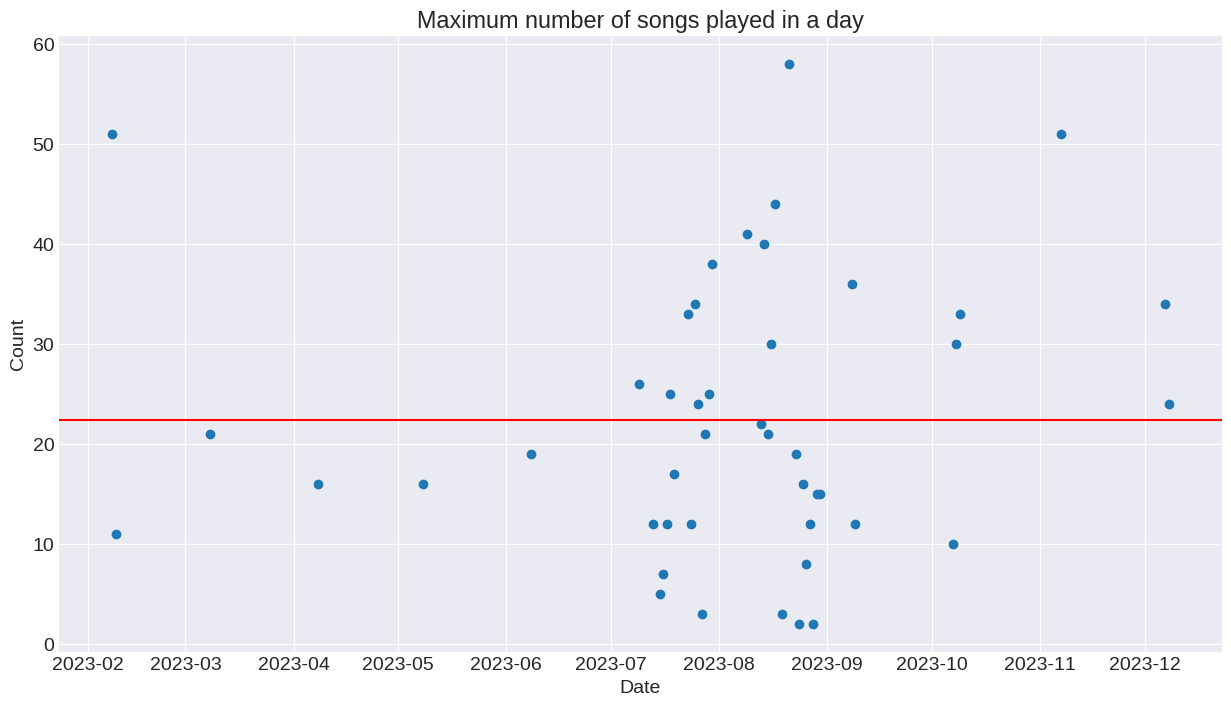

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="red");

### My favourite 100 Artist in word could

In [45]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Pritam             108
Arijit Singh        29
Aditya Rikhari      29
VIBIE               24
Jeet Gannguli       22
                  ... 
Sickflip             2
Siddhant Bhosle      2
Alyssa Mendonsa      2
Mickey Singh         2
Mustafa Zahid        2
Name: Count, Length: 100, dtype: int64

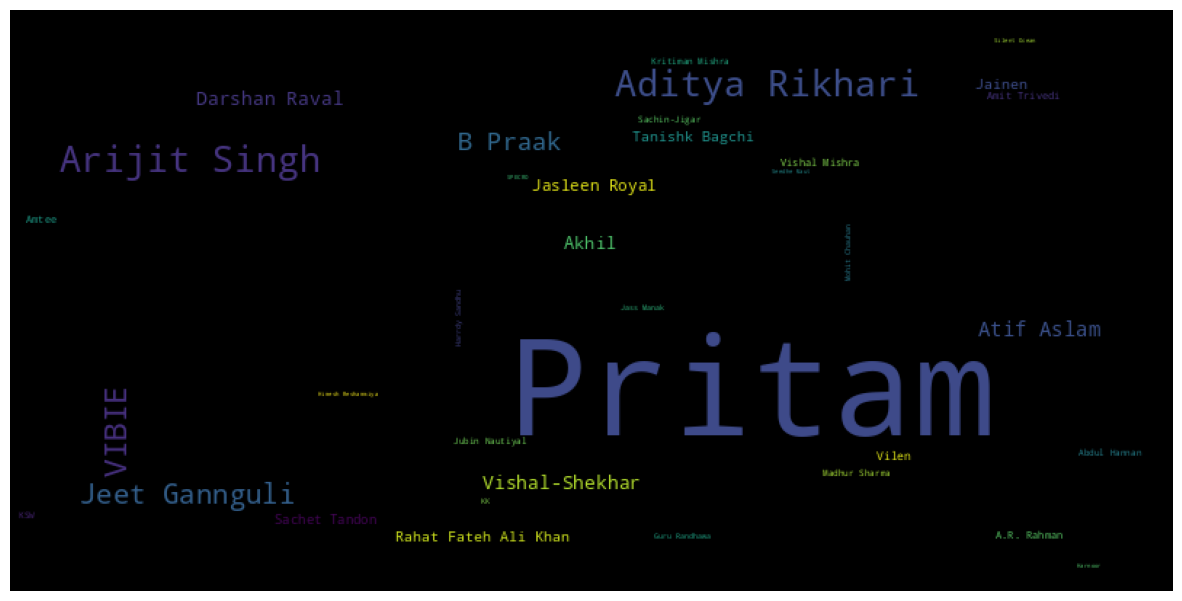

In [46]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_artist)
plot_cloud(wordcloud)

## My Favourite Artist playlist based on count of songs.

In [47]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

Count
artistName           trackName                                          
Amtee                Shayad X Samjhawan - Lofi Flip                    8
VIBIE                Saibo - Lofi Flip                                 7
Pritam               Kabira                                            6
                     Phir Le Aya Dil - Reprise                         6
                     Channa Mereya - Unplugged                         6
...                                                                  ...
                     O Bedardeya (From "Tu Jhoothi Main Makkaar")      2
                     Meri Tum Ho (Unplugged)                           2
Rahat Fateh Ali Khan Main Jahaan Rahoon                                2
Javed-Mohsin         Pal                                               2
Silent Ocean         Chaand Baaliyan - Lofi Flip                       2

[100 rows x 1 columns]

## My Favourite 100 Songs In Word Cloud.

To see what are top 100 songs that I usually listen to.

In [48]:
fav_songs = spotify_stream_df.groupby(["trackName"])["Count"].count()

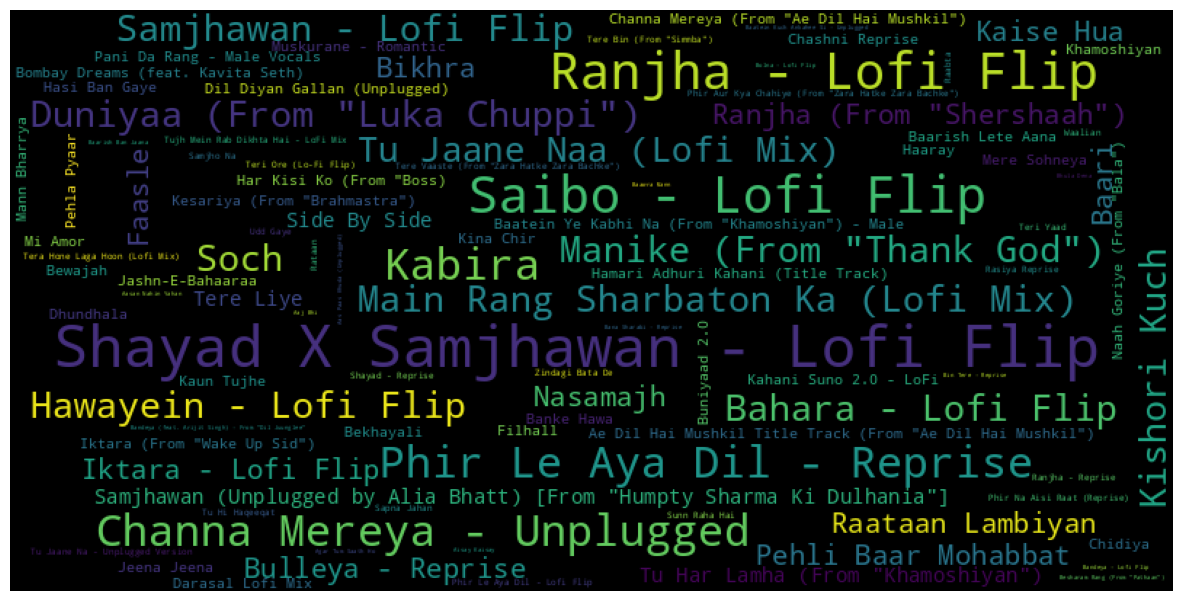

In [49]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

## Most Usage ( Active usage in a day over a week) via a heatmap.

In [50]:
active_usage = spotify_stream_df.groupby(['hours', 'dayName'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'dayName', 'artistName')
active_usage_pivot.head()

<ipython-input-50-f6a60ff83188>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  active_usage_pivot = active_usage.pivot("hours", 'dayName', 'artistName')


dayName,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
7,19.0,NaN,10.0,NaN,3.0,4.0,4.0
8,2.0,NaN,8.0,NaN,10.0,25.0,28.0
9,22.0,10.0,4.0,24.0,1.0,14.0,25.0
10,2.0,NaN,7.0,14.0,19.0,7.0,39.0
11,NaN,NaN,26.0,NaN,NaN,NaN,4.0


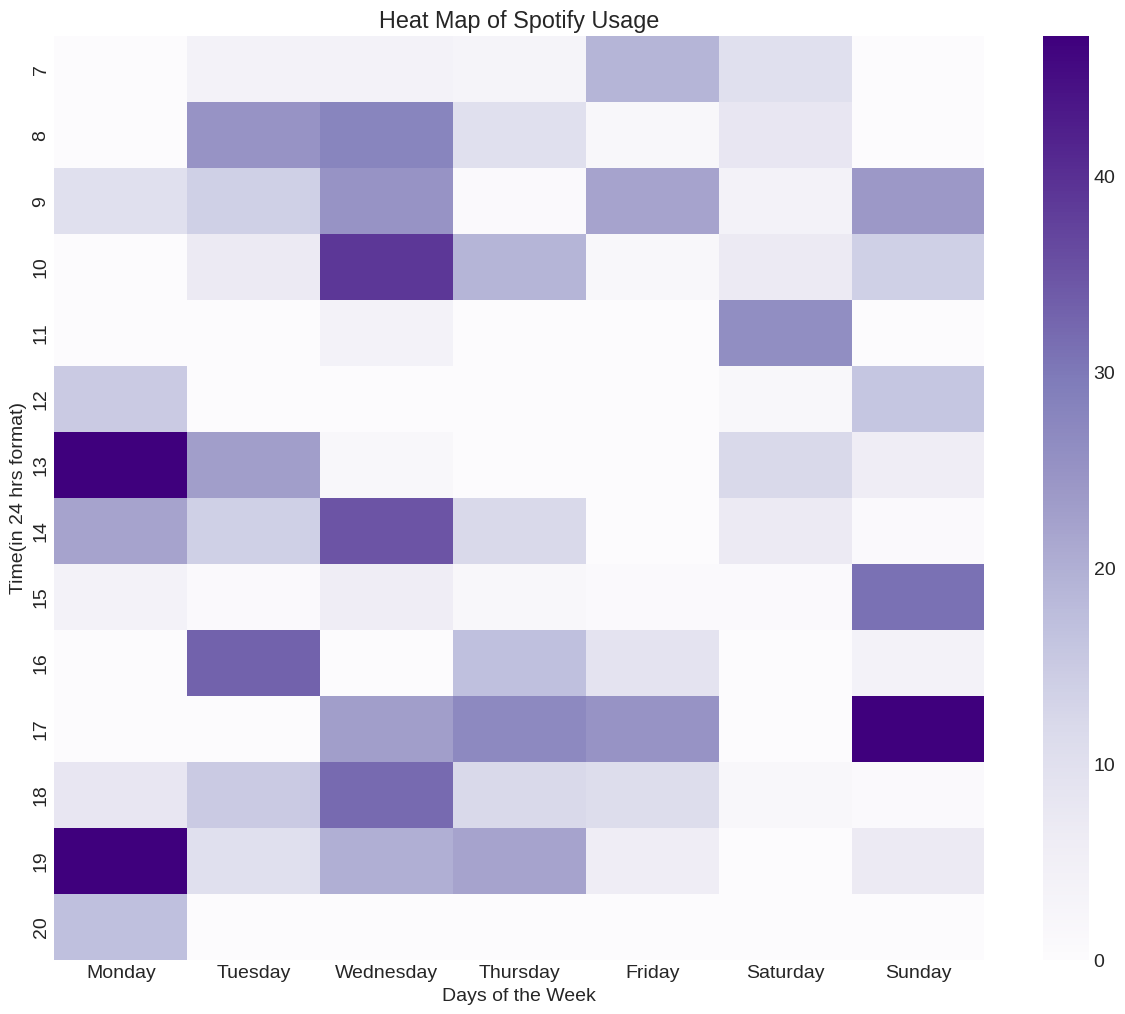

In [51]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Purples", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

## Usage Analysis over a week via countplot

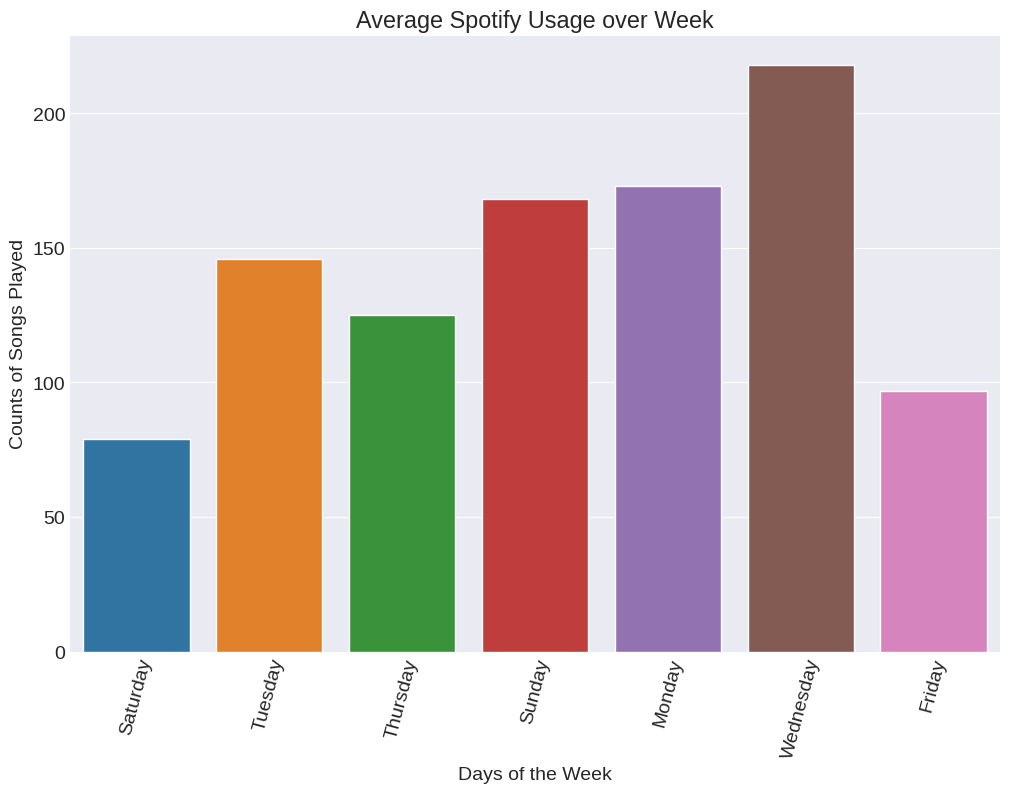

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["dayName"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

## What is the percentage of usage distribution between Weekday and Weekend

In [53]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["dayName"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,759
True,247


In [54]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,759,75.447316
True,247,24.552684


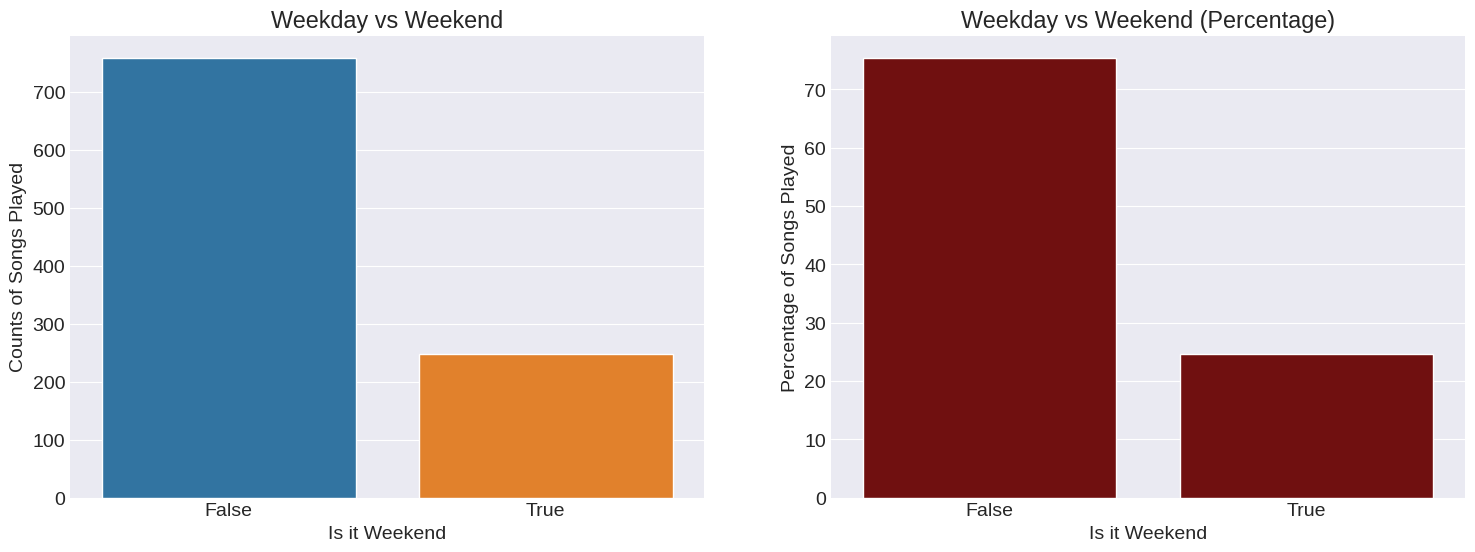

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Maroon",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

# Now, we will evaluate the listening behavior via Machine Learning

# Splitting and Model Training

In [56]:
# Encode categorical variables like 'artistName' and 'trackName'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
spotify_df['artistName'] = label_encoder.fit_transform(spotify_df['artistName'])
spotify_df['artistName']

0       243
1       243
2        93
3        93
4        93
       ... 
1001     43
1002    254
1003    131
1004    179
1005     43
Name: artistName, Length: 1006, dtype: int64

In [57]:
# Encode categorical variables like 'artistName' and 'trackName'
spotify_df['trackName'] = label_encoder.fit_transform(spotify_df['trackName'])
spotify_df['trackName']

0       429
1       429
2       140
3       139
4       516
       ... 
1001    388
1002     85
1003    193
1004    186
1005    461
Name: trackName, Length: 1006, dtype: int64

In [58]:
# Independent Variables
x = spotify_df[['artistName', 'trackName']].values
x
x = spotify_df.drop('msPlayed', axis=1)
x.values

array([['10-07-2023 08:07', '31ibo62lfee26rxgjoxvtsdt5eli', 'ANDROID',
        ..., 'IN', 'unknown', False],
       ['10-07-2023 08:56', '31ibo62lfee26rxgjoxvtsdt5eli',
        'ANDROID_ARM', ..., 'IN', 'unknown', False],
       ['10-07-2023 09:51', '31ibo62lfee26rxgjoxvtsdt5eli',
        'ANDROID_ARM', ..., 'IN', 'unknown', False],
       ...,
       ['10-09-2023 20:04', '31ibo62lfee26rxgjoxvtsdt5eli',
        'ANDROID_ARM', ..., 'IN', 'unknown', False],
       ['10-09-2023 20:09', '31ibo62lfee26rxgjoxvtsdt5eli',
        'ANDROID_ARM', ..., 'IN', 'unknown', False],
       ['10-09-2023 20:09', '31ibo62lfee26rxgjoxvtsdt5eli',
        'ANDROID_ARM', ..., 'IN', 'unknown', False]], dtype=object)

In [59]:
# Dependent Variable
y = spotify_df[['msPlayed']].values
y

array([[177845],
       [  7124],
       [  9157],
       ...,
       [188254],
       [  4853],
       [268950]])

In [60]:
# Splitting the data into training ans testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=10)

In [61]:
x_train=np.arange(0,len(x_train),1) # For making x as same size as y
y_train=np.arange(0,len(y_train),1)

In [62]:
print("First 10 rows of training data (independent variables):")
print(x_train)

First 10 rows of training data (independent variables):
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [63]:
print("First 10 rows of training data (dependent variables):")
print(y_train)

First 10 rows of training data (dependent variables):
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 2

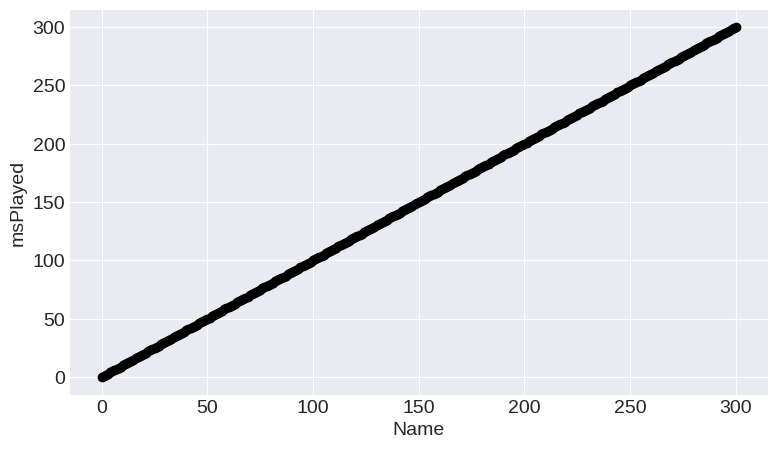

In [64]:
# Correlation between x and y
plt.xlabel('Name')
plt.ylabel('msPlayed')
plt.scatter(x_train,y_train,color='black')

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x_train = x_train.reshape(-1,1)
model.fit(x_train, y_train)

LinearRegression()

In [66]:
lr_accuracy = model.score(x_train,y_train) # Model's Accuracy
lr_accuracy

1.0

In [67]:
# Making Predictions
x_test = x_test[['artistName']]
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 71.,  28., 119.,  54.,  75., 264., 265.,   9., 260., 144., 195.,
         9., 246.,  66., 179.,  54., 179.,   0., 181., 260., 259.,  66.,
       143., 246.,  15., 181., 250.,  73.,  15.,  28., 179.,  54., 228.,
        28., 179., 121., 118., 261.,  24., 179., 243., 212., 233., 179.,
       119., 108.,  43., 126., 165., 242., 114., 265., 117., 216.,  91.,
         8., 113., 246., 117.,   5., 264., 175., 232.,  86.,  11., 109.,
        13.,  50.,  59., 157., 209., 117., 161., 201., 255., 198.,  15.,
        97., 103., 117.,  70., 138.,  77., 127., 197., 147., 147.,   0.,
       155., 179.,  39., 117.,  68.,  11., 255.,  89., 131., 179., 211.,
        94., 138., 160., 179.,   5.,  84., 117.,   9., 269., 179., 179.,
       147.,  50.,  90.,   0.,  45.,  61., 205., 243., 260., 179.,  64.,
       163., 179., 183., 143., 258., 117., 100., 254., 170., 255., 160.,
       148., 179., 179., 179.,  50., 135., 247.,  52., 275., 229.,  54.,
        10., 119., 145.,  63., 124., 217., 255.,  7

In [68]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_Score:", r2)

Mean Squared Error: 22475772621.087944
r2_Score: -1.006808000951401


In [69]:
new_song = pd.DataFrame({
    'lr_artistName_Artist': [1]  # Replace with the one-hot encoding for the artist
})

lr_predicted_ms_played = model.predict(new_song)
print("Predicted msPlayed for the new song: ",lr_predicted_ms_played, "milliseconds")

Predicted msPlayed for the new song:  [1.] milliseconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### New song will be played by the user whose ms_Played is in between 1.0-1.9ms.

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
log_accuracy = model.score(x_train, y_train) # Model's Accuracy
log_accuracy

0.009966777408637873

In [72]:
# Making Predictions
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([ 21,  21, 219,  21, 110, 299, 299,  10, 299, 299, 299,  10, 299,
        21, 299,  21, 299,   0, 299, 299, 299,  21, 299, 299,  10, 299,
       299,  21,  10,  21, 299,  21, 299,  21, 299, 219, 219, 299,  21,
       299, 299, 299, 299, 299, 219, 218,  21, 220, 299, 299, 219, 299,
       219, 299, 142,  10, 219, 299, 219,  10, 299, 299, 299, 132,  10,
       219,  10,  21,  21, 299, 299, 219, 299, 299, 299, 299,  10, 154,
       171, 219,  21, 299, 113, 220, 299, 299, 299,   0, 299, 299,  21,
       219,  21,  10, 299, 138, 299, 299, 299, 147, 299, 299, 299,  10,
       128, 219,  10, 299, 299, 299, 299,  21, 140,   0,  21,  21, 299,
       299, 299, 299,  21, 299, 299, 299, 299, 299, 219, 163, 299, 299,
       299, 299, 299, 299, 299, 299,  21, 299, 299,  21, 299, 299,  21,
        10, 219, 299,  21, 219, 299, 299,  21,  10, 219, 299, 299, 299,
        10, 299, 299, 299, 299, 299,  10,  21, 299, 299, 299, 299, 299,
       299, 299, 299, 219, 299, 299, 299, 219, 299, 128,  21,  2

In [73]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_Score:", r2)

Mean Squared Error: 22461960037.052483
r2_Score: -1.005574708346805


In [74]:
new_song = pd.DataFrame({
    'artistName_ArtistX': [1]  # Replace with the one-hot encoding for the artist
})

log_predicted_ms_played = model.predict(new_song)
print("Predicted msPlayed for the new song: ",log_predicted_ms_played, "milliseconds")

Predicted msPlayed for the new song:  [6] milliseconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### New song will be played by the user whose ms_Played is 6ms.

# KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor with a specified number of neighbors (k)
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [76]:
knn_accuracy = knn_model.score(x_train, y_train) # Model's Accuracy
knn_accuracy

0.9999955996567732

In [77]:
y_pred = knn_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


array([ 71.,  28., 119.,  54.,  75., 264., 265.,   9., 260., 144., 195.,
         9., 246.,  66., 179.,  54., 179.,   2., 181., 260., 259.,  66.,
       143., 246.,  15., 181., 250.,  73.,  15.,  28., 179.,  54., 228.,
        28., 179., 121., 118., 261.,  24., 179., 243., 212., 233., 179.,
       119., 108.,  43., 126., 165., 242., 114., 265., 117., 216.,  91.,
         8., 113., 246., 117.,   5., 264., 175., 232.,  86.,  11., 109.,
        13.,  50.,  59., 157., 209., 117., 161., 201., 255., 198.,  15.,
        97., 103., 117.,  70., 138.,  77., 127., 197., 147., 147.,   2.,
       155., 179.,  39., 117.,  68.,  11., 255.,  89., 131., 179., 211.,
        94., 138., 160., 179.,   5.,  84., 117.,   9., 269., 179., 179.,
       147.,  50.,  90.,   2.,  45.,  61., 205., 243., 260., 179.,  64.,
       163., 179., 183., 143., 258., 117., 100., 254., 170., 255., 160.,
       148., 179., 179., 179.,  50., 135., 247.,  52., 275., 229.,  54.,
        10., 119., 145.,  63., 124., 217., 255.,  7

In [78]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_Score:", r2)

Mean Squared Error: 22475767296.524822
r2_Score: -1.0068075255338904


In [79]:
# For tuning parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

# Evaluate the best KNN model
y_pred_best = best_knn_model.predict(x_test)
y_pred_best

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


array([ 71.,  28., 119.,  54.,  75., 264., 265.,   9., 260., 144., 195.,
         9., 246.,  66., 179.,  54., 179.,   1., 181., 260., 259.,  66.,
       143., 246.,  15., 181., 250.,  73.,  15.,  28., 179.,  54., 228.,
        28., 179., 121., 118., 261.,  24., 179., 243., 212., 233., 179.,
       119., 108.,  43., 126., 165., 242., 114., 265., 117., 216.,  91.,
         8., 113., 246., 117.,   5., 264., 175., 232.,  86.,  11., 109.,
        13.,  50.,  59., 157., 209., 117., 161., 201., 255., 198.,  15.,
        97., 103., 117.,  70., 138.,  77., 127., 197., 147., 147.,   1.,
       155., 179.,  39., 117.,  68.,  11., 255.,  89., 131., 179., 211.,
        94., 138., 160., 179.,   5.,  84., 117.,   9., 269., 179., 179.,
       147.,  50.,  90.,   1.,  45.,  61., 205., 243., 260., 179.,  64.,
       163., 179., 183., 143., 258., 117., 100., 254., 170., 255., 160.,
       148., 179., 179., 179.,  50., 135., 247.,  52., 275., 229.,  54.,
        10., 119., 145.,  63., 124., 217., 255.,  7

In [80]:
# Prediction
new_song = pd.DataFrame({
    'artistName_Artist': [1]  # Replace with the one-hot encoding for the artist
})

knn_predicted_ms_played = knn_model.predict(new_song)
print("Predicted msPlayed for the new song: ",knn_predicted_ms_played, "milliseconds")

Predicted msPlayed for the new song:  [2.] milliseconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


### New song will be played by the user whose ms_Played is in between 2.0-2.9ms.

# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
rf_accuracy = rf_classifier.score(x_train, y_train) # Model's Accuracy
rf_accuracy

1.0

In [83]:
y_pred = rf_classifier.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([ 71,  28, 119,  54,  75, 264, 265,   9, 260, 144, 195,   9, 246,
        66, 179,  54, 179,   0, 181, 260, 259,  66, 143, 246,  15, 181,
       250,  73,  15,  28, 179,  54, 228,  28, 179, 121, 118, 261,  24,
       179, 243, 212, 233, 179, 119, 108,  43, 126, 165, 242, 114, 265,
       117, 216,  91,   8, 113, 246, 117,   5, 264, 175, 232,  86,  11,
       109,  13,  50,  59, 157, 209, 117, 161, 201, 255, 198,  15,  97,
       103, 117,  70, 138,  77, 127, 197, 147, 147,   0, 155, 179,  39,
       117,  68,  11, 255,  89, 131, 179, 211,  94, 138, 160, 179,   5,
        84, 117,   9, 269, 179, 179, 147,  50,  90,   0,  45,  61, 205,
       243, 260, 179,  64, 163, 179, 183, 143, 258, 117, 100, 254, 170,
       255, 160, 148, 179, 179, 179,  50, 135, 247,  52, 275, 229,  54,
        10, 119, 145,  63, 124, 217, 255,  73,  11, 117, 179, 181, 265,
        11, 185, 258, 227, 217, 145,  18,  66, 241, 194, 271, 194, 265,
       172, 181, 198, 122, 243, 179, 164, 115, 254,  84,  43,  3

In [84]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_Score:", r2)

Mean Squared Error: 22475772621.087944
r2_Score: -1.006808000951401


In [85]:
# Prediction
new_song = pd.DataFrame({
    'artistName_Artist': [1]  # Replace with the one-hot encoding for the artist
})

rf_predicted_ms_played = rf_classifier.predict(new_song)
print("Predicted msPlayed for the new song: ",rf_predicted_ms_played, "milliseconds")

Predicted msPlayed for the new song:  [1] milliseconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### New song will be played by the user whose ms_Played is 1ms.

# Decision Tree Classification

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
dt_accuracy = clf.score(x_train, y_train) # Model's accuracy
dt_accuracy

1.0

In [88]:
y_pred = clf.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([ 71,  28, 119,  54,  75, 264, 265,   9, 260, 144, 195,   9, 246,
        66, 179,  54, 179,   0, 181, 260, 259,  66, 143, 246,  15, 181,
       250,  73,  15,  28, 179,  54, 228,  28, 179, 121, 118, 261,  24,
       179, 243, 212, 233, 179, 119, 108,  43, 126, 165, 242, 114, 265,
       117, 216,  91,   8, 113, 246, 117,   5, 264, 175, 232,  86,  11,
       109,  13,  50,  59, 157, 209, 117, 161, 201, 255, 198,  15,  97,
       103, 117,  70, 138,  77, 127, 197, 147, 147,   0, 155, 179,  39,
       117,  68,  11, 255,  89, 131, 179, 211,  94, 138, 160, 179,   5,
        84, 117,   9, 269, 179, 179, 147,  50,  90,   0,  45,  61, 205,
       243, 260, 179,  64, 163, 179, 183, 143, 258, 117, 100, 254, 170,
       255, 160, 148, 179, 179, 179,  50, 135, 247,  52, 275, 229,  54,
        10, 119, 145,  63, 124, 217, 255,  73,  11, 117, 179, 181, 265,
        11, 185, 258, 227, 217, 145,  18,  66, 241, 194, 271, 194, 265,
       172, 181, 198, 122, 243, 179, 164, 115, 254,  84,  43,  3

In [89]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_Score:", r2)

Mean Squared Error: 22475772621.087944
r2_Score: -1.006808000951401


In [90]:
# Prediction
new_song = pd.DataFrame({
    'artistName_Artist': [1]  # Replace with the one-hot encoding for the artist
})

dt_predicted_ms_played = clf.predict(new_song)
print("Predicted msPlayed for the new song: ",dt_predicted_ms_played, "milliseconds")

Predicted msPlayed for the new song:  [1] milliseconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### New song will be played by the user whose ms_Played is 1ms.

## Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

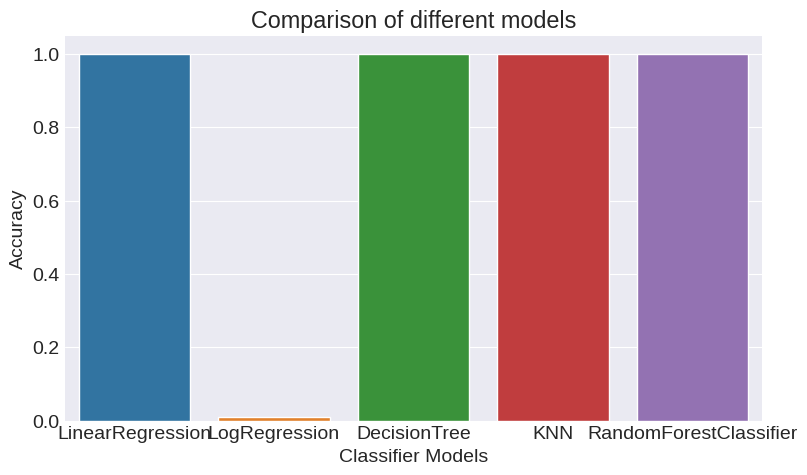

In [91]:
from sklearn.metrics import accuracy_score
#comparing the accuracy of different models
models = ['LinearRegression','LogRegression','DecisionTree','KNN','RandomForestClassifier']
preds = [lr_accuracy, log_accuracy, dt_accuracy, knn_accuracy, rf_accuracy]

sns.barplot(x=models, y=preds)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

## From above evaluation, we can conclude that accuracy of Logistic Regression model is least.